Waste managerment using CNN Nodel

In [1]:
pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.5 MB ? eta -:--:--
    --------------------------------------- 0.5/39.5 MB 1.2 MB/s eta 0:00:33
    --------------------------------------- 0.5/39.5 MB 1.2 MB/s eta 0:00:33
    --------------------------------------- 0.5/39.5 MB 1.2 MB/s eta 0:00:33
    --------------------------------------- 0.8/39.5 MB 645.7 kB/s eta 0:01:00
    --------------------------------------- 0.8/39.5 MB 645.7 kB/s eta 0:01:00
   - -------------------------------------- 1.3/39.5 MB 818.6 kB/s eta 0:00:47
   - -------------------------------------- 1.6/39.5 MB 953.2 kB/s eta 0:00:40
   - -------------------------------------- 1.6/39.5 MB 953.2 kB/s eta 0:00:40
   - -------------------------------------- 1.8/39.5 MB 898.8 kB/s eta 0:00:42
   -- ---------

Libraries required

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_path = "DATASET/DATASET/TRAIN"
test_path = "DATASET/DATASET/TEST"

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [9]:
#Visualization
x_data =[]
y_data =[]
for category in glob(train_path+"/*"):
    for file in tqdm(glob(category+"/*")):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data,"label":y_data})

100%|██████████| 9999/9999 [01:05<00:00, 152.13it/s]


In [12]:
data.shape
data.dtypes

image    object
label    object
dtype: object

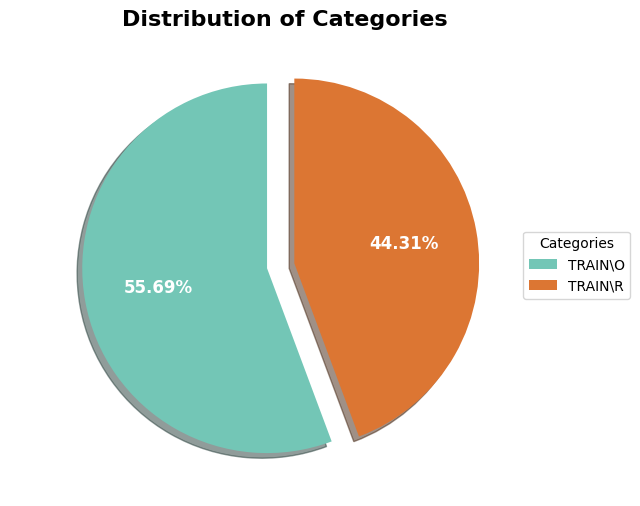

In [19]:
if len(value_counts) == 2:
    labels = value_counts.index.tolist()  
    counts = value_counts.values.tolist()  

   
    colors = ["#73c6b6", "#dc7633"]
    explode = [0.1 if count == max(counts) else 0.05 for count in counts]  

    
    fig, ax = plt.subplots(figsize=(8, 6))
    wedges, texts, autotexts = ax.pie(
        counts,
        labels=labels,
        autopct="%0.2f%%",
        colors=colors,
        startangle=90,
        explode=explode,
        shadow=True,
        textprops={'color': "w"},
    )
    
    ax.legend(wedges, labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.setp(autotexts, size=12, weight="bold")
    plt.title("Distribution of Categories", fontsize=16, weight="bold")
    plt.show()

else:
    print(f"Error: The data doesn't contain exactly two categories. Found {len(value_counts)} categories.")